<a href="https://colab.research.google.com/github/nathanschoeck/Machine-Learning/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Here is a Python implementation of the K-Nearest Neighbors (KNN) algorithm for classification using the scikit-learn library.

Explanation:
1. Dataset:
- The code uses the Iris dataset from scikit-learn as an example.
2. Data Preprocessing:
- The dataset is split into training and testing sets using train_test_split.
- Features are standardized using StandardScaler to ensure KNN works optimally.
3. Model Training:
- A KNeighborsClassifier object is created with k=3 (number of neighbors).
- The classifier is trained on the training data using fit.
4. Evaluation:
- The model predicts labels for the test data.
- Performance is evaluated using accuracy, confusion matrix, and classification report.
5. Visualization (Optional):
- Decision boundaries are visualized using the first two features of the Iris dataset.

Accuracy: 0.9111111111111111
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



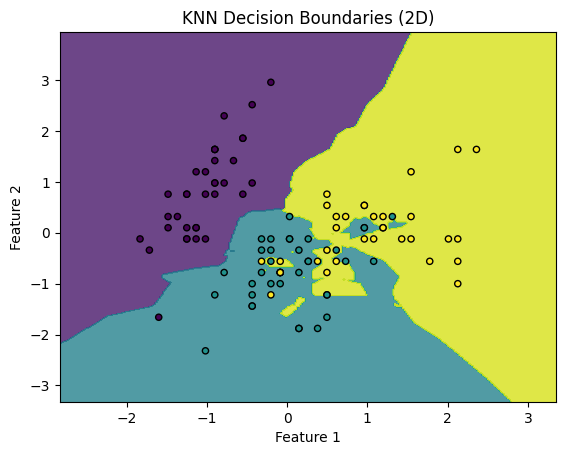

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize decision boundaries (optional for 2D data)
def plot_decision_boundaries(X, y, model, title="Decision Boundaries"):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize with first two features (optional)
knn_2d = KNeighborsClassifier(n_neighbors=k)
knn_2d.fit(X_train[:, :2], y_train)
plot_decision_boundaries(X_train[:, :2], y_train, knn_2d, title="KNN Decision Boundaries (2D)")